# **LGM-VIP Data Science Internship Programme**

# **Beginner Level Task-2**
# **Name: Stock Market Prediction and Forecasting using Stacked LSTM** 


**The data I have used for this Activity is data about Tata Industries Stock Market : iris.data**



Following are the few libraries we need to import for our fitting.

In [68]:
import math # used for denoting special mathametical functions
import numpy # numpy library used doing various operations on arrays
import pandas as pd # pandas library used for doing statstical calculations
import seaborn as sb # seaborn library is also used to interpreting the data in variousgraphs
import tensorflow as tf # specifically purpose of numerical computation using data-flow graphs as its source.
import matplotlib.pyplot as plt # Matplotlib library is used for interpreting data in various graphs
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

We firstly need to read the csv file into our variable called data. For this purpose, we use pre-defined function : read_csv in pandas library.

**Reading the csv file:**

In [69]:
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv') #Reading the csv file in data
data.head() #Head is used to show top 5 rows of the data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [70]:
data.shape

(2035, 8)

Text(0, 0.5, 'Close')

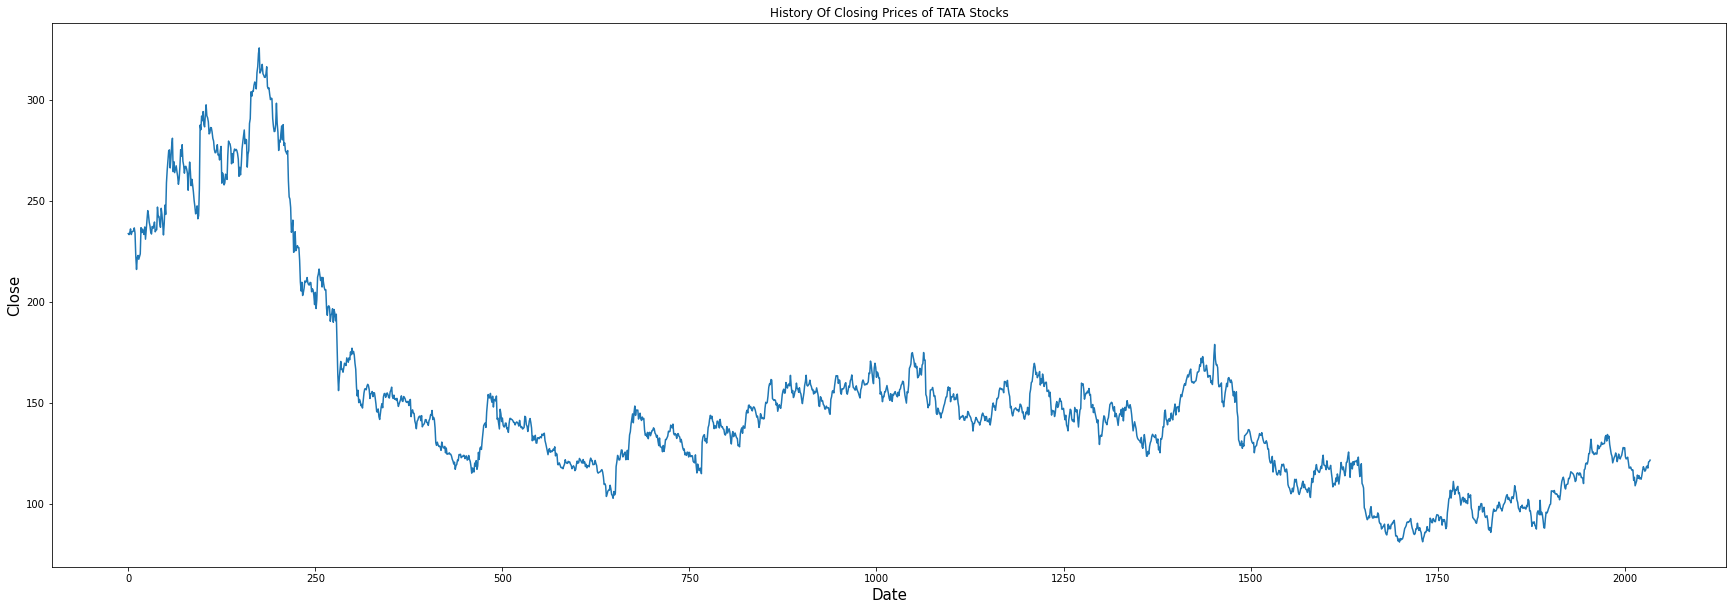

In [71]:
plt.figure(figsize=(30,10))
plt.title('History Of Closing Prices of TATA Stocks')
plt.plot(data['Close'])
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close',fontsize=15)


**Now for the prediction purpose, now I am going to select the 'Close' Column into a new data frame**

In [72]:
data1=data.reset_index()['Close']
data1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

Before going to LSTM Model we see that the values of close are in '233.75,233.25,234.25,.....' All values are near to some common value. Since computation becomes difficult we are going to use **MinMaxScaler** to change the values in the range of (0,1), So our computation of values becomes easier

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data1=scaler.fit_transform(numpy.array(data1).reshape(-1,1))
data1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

Splitting the dataset 'data1' into training phase(80%) and testing phase(20%)

In [74]:
train_size=int(len(data1)*0.80)
test_size=len(data1)-training_size
train_data,test_data=data1[0:training_size,:],data1[training_size:len(data1),:1]

In [75]:
train_size,test_size

(1628, 407)

In [76]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1435866 ],
       [0.13419118],
       [0.1431781 ]])

Before going to next step we should analyze that 'What kind off Dataset We got?'.

---


We got a Time Series Dataset.

---
Now we are going to link the values of datasets to each like

---
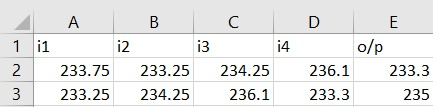


In [77]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

Now I am fixing the step size value as 100

In [78]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [79]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(1527, 100)
(1527,)
(306, 100)
(306,)


(None, None)

Reshapping the X_train and X_test dataframe

In [80]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# **Create the Stacked LSTM model**

In [82]:
lst=Sequential()
lst.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
lst.add(LSTM(50,return_sequences=True))
lst.add(LSTM(50))
lst.add(Dense(1))
lst.compile(loss='mean_squared_error',optimizer='adam')

In [83]:
lst.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [84]:
lst.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
24/24 [==============================] - 10s 234ms/step - loss: 0.0158 - val_loss: 0.0018
Epoch 2/100
24/24 [==============================] - 4s 177ms/step - loss: 0.0021 - val_loss: 6.4297e-04
Epoch 3/100
24/24 [==============================] - 4s 179ms/step - loss: 0.0016 - val_loss: 6.6481e-04
Epoch 4/100
24/24 [==============================] - 4s 183ms/step - loss: 0.0016 - val_loss: 6.5549e-04
Epoch 5/100
24/24 [==============================] - 4s 183ms/step - loss: 0.0015 - val_loss: 8.1878e-04
Epoch 6/100
24/24 [==============================] - 4s 183ms/step - loss: 0.0013 - val_loss: 6.8600e-04
Epoch 7/100
24/24 [==============================] - 4s 181ms/step - loss: 0.0012 - val_loss: 5.2110e-04
Epoch 8/100
24/24 [==============================] - 4s 185ms/step - loss: 0.0012 - val_loss: 6.9330e-04
Epoch 9/100
24/24 [==============================] - 4s 183ms/step - loss: 0.0011 - val_loss: 5.1584e-04
Epoch 10/100
24/24 [==============================] - 4s 1

**Prediction**

In [91]:
train_predict=lst.predict(X_train)
test_predict=lst.predict(X_test)

Reversing the MinMax Scaler

In [92]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

Trained Data RMSE

In [93]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

161.43728302192883

Tested Data RMSE

In [94]:
math.sqrt(mean_squared_error(ytest,test_predict))

107.65282308965755

Plotting the Predictions

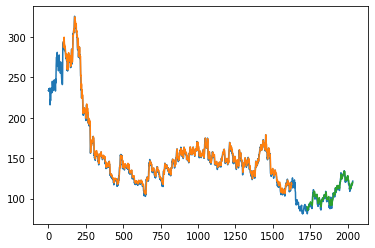

In [95]:
look_back=100
trainumpyredictPlot = numpy.empty_like(data1)
trainumpyredictPlot[:, :] = numpy.nan
trainumpyredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(data1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(data1))
plt.plot(trainumpyredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Future Prediction

In [96]:
x_inumpyut=test_data[307:].reshape(1,-1)
x_inumpyut.shape
temp_inumpyut=list(x_inumpyut)
temp_inumpyut=temp_inumpyut[0].tolist()
temp_inumpyut=list(x_inumpyut)
temp_inumpyut=temp_inumpyut[0].tolist()

In [99]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_inumpyut)
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = lst.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_inumpyut)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = lst.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0.13521242 0.14522

In [101]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

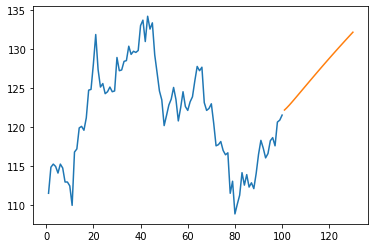

In [102]:
plt.plot(day_new,scaler.inverse_transform(data1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

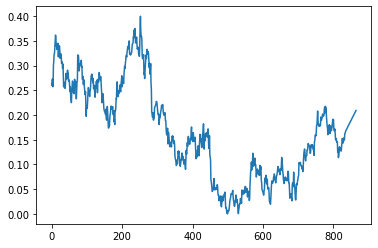

In [106]:
data2=data1.tolist()
data2.extend(lst_output)
plt.plot(data2[1200:])

In [107]:
data3=scaler.inverse_transform(data2).tolist()

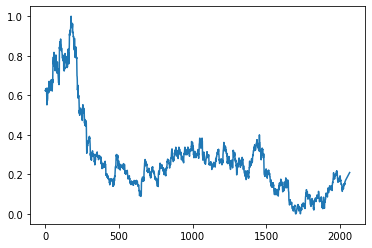

In [108]:
plt.plot(data2)